Made by [NaturalStupldity]("https://github.com/NaturalStupldity")

In [6]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [2]:
# 1. Припустимо, що у вас є багатошаровий перцептрон, що складається з одного вхідного шару з 10 нейронами, за яким є ще один прихований шар з 50 нейронами і один вихідний шар з 3 нейронами. Всі штучні нейрони застосовують функцію активації ReLU.

In [7]:
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='relu'))

2023-10-29 14:27:18.206453: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-29 14:27:18.206517: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-29 14:27:18.206521: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-29 14:27:18.206894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-29 14:27:18.207246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# 1.1 Яка форма вхідної матриці X ?

In [9]:
# Форма матриці X - (bs, 10), де bs - mini-batch size

In [10]:
# 1.2 Що можна сказати про форму вектора ваг W_h прихованого шару?

In [11]:
# Форма вектора ваг W_h - (10, 50)

In [12]:
# 1.3 і форму його вектора зсувів b_h ?

In [13]:
# Форма вектора зсувів b_h - (50,)

In [14]:
# 1.4 Яка форма вектора ваг W_0 вихідного шару?

In [15]:
# Форма вектора ваг W_0 - (50, 3)

In [16]:
# 1.5 і форму його вектора зсувів b_0 ?

In [17]:
# Форма вектора зсувів b_0 - (3,)

In [18]:
# Яка форма вихідної матриці Y мережі?

In [19]:
# Форма матриці Y - (bs, 3), де bs - mini-batch size

In [20]:
# 1.6 Напишіть рівняння, яке обчислює вихідну матрицю Y мережі як функцію від X, W_h, b_h, W_0 та b_0.

In [21]:
# Y = relu(relu(X * W_h + b_h) * W_0 + b_0), де relu - функція активації, * - матричне множення

In [22]:
# 2. Порівняйте точність класифікації нейронної мережі з різними нелінійними функціями активації з точністю класифікації нейронної мережі з лінійною функцією активації.

In [23]:
# Якщо використовувати лінійну функцію активації, то нейронна мережа буде еквівалентна лінійній моделі, тому точність класифікації буде низькою. Якщо використовувати нелінійну функцію активації, то точність класифікації буде вищою. Покажемо це на прикладі:

In [24]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# ReLU
model_relu = Sequential()
model_relu.add(Flatten(input_shape=(28, 28)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_relu.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
accuracy_relu = model_relu.evaluate(test_images, test_labels, verbose=0)[1]

# Linear
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(28, 28)))
model_linear.add(Dense(128, activation='linear'))
model_linear.add(Dense(10, activation='softmax'))

model_linear.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_linear.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
accuracy_linear = model_linear.evaluate(test_images, test_labels, verbose=0)[1]

print(f'Точність моделі з ReLU активацією: {accuracy_relu}')
print(f'Точність моделі з лінійною активацією: {accuracy_linear}')

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
  8/938 [..............................] - ETA: 6s - loss: 1.9731 - accuracy: 0.3477  

2023-10-29 14:35:03.456740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


937/938 [============================>.] - ETA: 0s - loss: 0.3755 - accuracy: 0.8943

2023-10-29 14:35:10.081212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 8s 8ms/step - loss: 0.3754 - accuracy: 0.8944 - val_loss: 0.2941 - val_accuracy: 0.9200
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2995 - accuracy: 0.9163 - val_loss: 0.2835 - val_accuracy: 0.9204
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2933 - accuracy: 0.9185 - val_loss: 0.2876 - val_accuracy: 0.9187
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2954 - accuracy: 0.9178 - val_loss: 0.3103 - val_accuracy: 0.9175
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.3009 - accuracy: 0.9169 - val_loss: 0.3001 - val_accuracy: 0.9200
Epoch 1/5
 16/938 [..............................] - ETA: 6s - loss: 1.6020 - accuracy: 0.5000

2023-10-29 14:35:42.340849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.3684 - accuracy: 0.8955

2023-10-29 14:35:48.799065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 7s 8ms/step - loss: 0.3684 - accuracy: 0.8955 - val_loss: 0.3000 - val_accuracy: 0.9149
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2918 - accuracy: 0.9187 - val_loss: 0.2818 - val_accuracy: 0.9200
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2821 - accuracy: 0.9225 - val_loss: 0.2958 - val_accuracy: 0.9164
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2759 - accuracy: 0.9234 - val_loss: 0.2873 - val_accuracy: 0.9201
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.2707 - accuracy: 0.9241 - val_loss: 0.2811 - val_accuracy: 0.9208
Точність моделі з ReLU активацією: 0.9200000166893005
Точність моделі з лінійною активацією: 0.9208000302314758


In [25]:
# 3. Для двошарової нейронної мережі з фіксованою функцією активації a(x) побудуйте графік залежності часу навчання нейронної мережі і точності класифікації від кількості нейронів в прихованому шарі мережі.

# a(x) = 1 / (1 + exp(-x))

In [28]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def train(hidden_neurons, epochs=100):
    # Generate a toy dataset
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize lists to store results
    training_times = []
    accuracies = []

    for n_neurons in hidden_neurons:
        model = Sequential()
        model.add(Dense(n_neurons, input_dim=20, activation=sigmoid))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

        # Train the model
        start_time = time.time()
        model.fit(X_train, y_train, epochs=epochs, verbose=0)
        end_time = time.time()

        training_time = end_time - start_time
        training_times.append(training_time)

        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(accuracy)

    return training_times, accuracies

2023-10-29 14:47:17.262469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:25.668556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:25.962707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:34.090779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:34.321066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:42.330012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 14:47:42.555528: I tensorflow/core/grappler/optimizers/cust

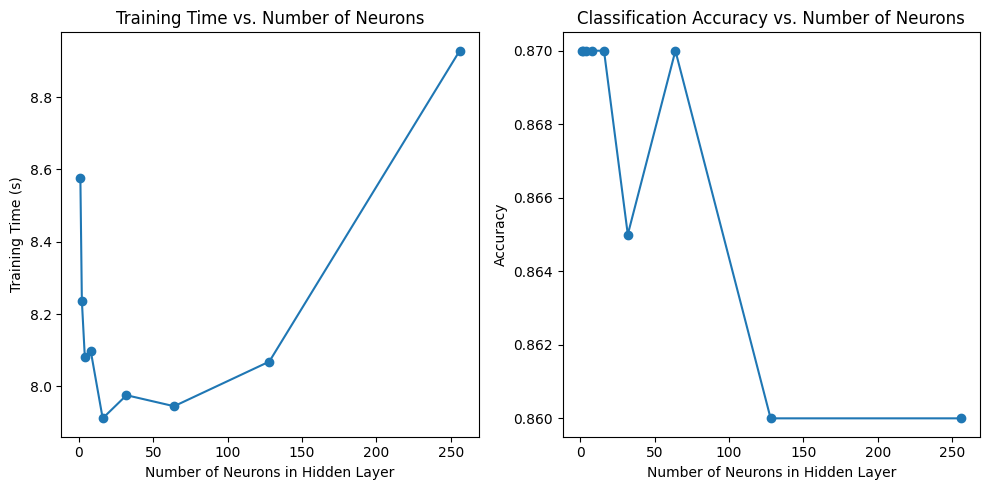

In [31]:
hidden_neurons = [1, 2, 4, 8, 16, 32, 64, 128, 256]

training_times, accuracies = train(hidden_neurons)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hidden_neurons, training_times, marker='o')
plt.title('Training Time vs. Number of Neurons')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Training Time (s)')

plt.subplot(1, 2, 2)
plt.plot(hidden_neurons, accuracies, marker='o')
plt.title('Classification Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [32]:
# Бачимо, що час навчання зростає зі збільшенням кількості нейронів в прихованому шарі, а точність класифікації зростає до певного моменту, а потім зменшується. (На початку час тренування теж досить великий, бо залізу потрібен час, аби розігрітися)

In [33]:
# 4. Побудуйте графік залежності часу навчання нейронної мережі і точності класифікації від кількості прихованих шарів (всі приховані шари однакового розміру) для багатошарової нейронної мережі з фіксованою функцією активації a(x).

# a(x) = th(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import time

def custom_tanh(x):
    return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

def build_model(num_hidden_layers, hidden_layer_size):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_shape,)))

    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(hidden_layer_size, activation=custom_tanh))

    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

num_samples = 1000
input_shape = 20
num_classes = 2

X = np.random.rand(num_samples, input_shape)
y = np.random.randint(2, size=num_samples)
y = keras.utils.to_categorical(y, num_classes)

hidden_layer_sizes = [16, 32, 64, 128]
num_hidden_layers_range = [1, 2, 3, 4]

training_times = []
accuracies = []

In [48]:
for num_hidden_layers in num_hidden_layers_range:
    for hidden_layer_size in hidden_layer_sizes:
        model = build_model(num_hidden_layers, hidden_layer_size)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=10, verbose=0)
        end_time = time.time()

        training_time = end_time - start_time
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        training_times.append(training_time)
        accuracies.append(accuracy)

2023-10-29 15:00:40.793363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:42.922017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:43.160663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:44.861670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:45.081561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:46.818981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-29 15:00:47.045614: I tensorflow/core/grappler/optimizers/cust

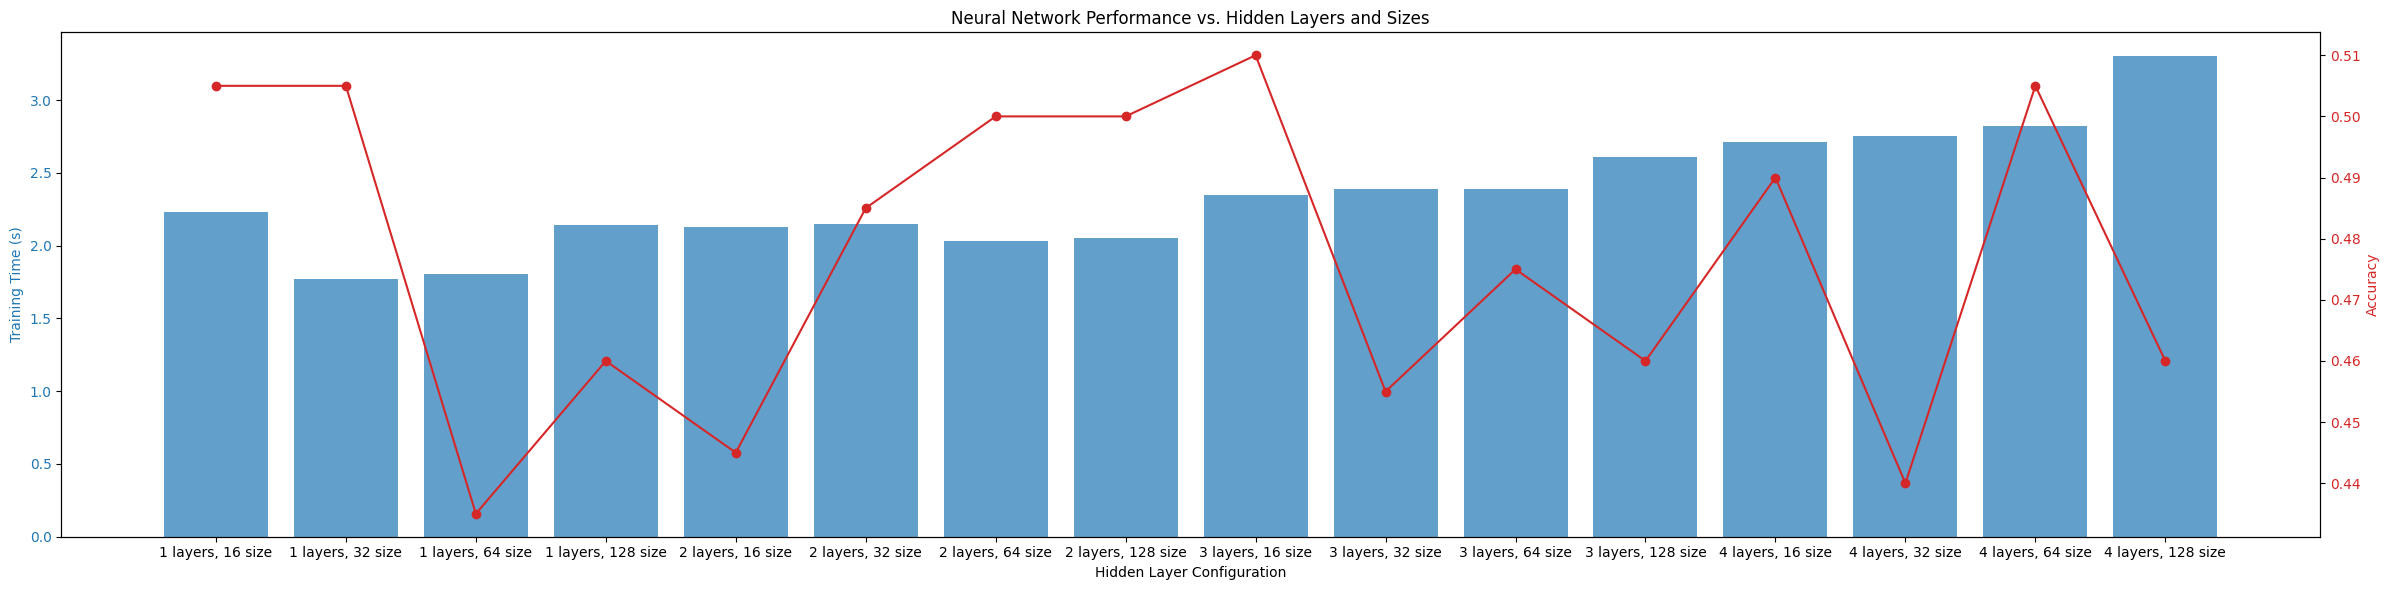

In [51]:
fig, ax1 = plt.subplots(figsize=(24, 6))

ax1.set_xlabel('Hidden Layer Configuration')
ax1.set_ylabel('Training Time (s)', color='tab:blue')
ax1.bar(range(len(accuracies)), training_times, color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.plot(range(len(accuracies)), accuracies, color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(range(len(accuracies)), [f'{nl} layers, {sz} size' for nl in num_hidden_layers_range for sz in hidden_layer_sizes], rotation=45, ha='right')
plt.title('Neural Network Performance vs. Hidden Layers and Sizes')
plt.tight_layout()
plt.show()

In [52]:
# Збільшення розміру міні-батчу, очевидно зменшує час тренування. Збільшення розмірів моделі веде до покращення точності моделі, але збільшує час тренування.